In [189]:
#%matplotlib inline     
# ^Sans animations
%matplotlib notebook 
# ^Avec animations
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

## Partie I : Etude de remplissage d'une bibliothèque

### I. Evolution du remplissage de la bibliothèque en tenant compte de probabilité
 

Nous allons modeliser l'évolution de l'affluence dans la bibliothèque des Licences au cours du temps.

Nous disposons des horaires et du nombre de place de la bibliothèque 

In [11]:
# aff : le taux d'affluence actuelle
# afflim : le taux d'affluence à partir duquel la personne hésite
# p1 : la probabilité que la personne ne rentre pas dans la bibliothèque

def alea_entree(aff,afflim,p1):
    '''
    float->int
    en fonction du taux d'affluence et d'une probabilité ,retourne 1 si l'élève rentre, sinon 0.
    '''
    if aff>=afflim :
        u = np.random.random() # u est un nombre aléatoire entre 0 et 1
        if u < p1: 
            return 0
    return 1

In [12]:
# aff : le taux d'affluence actuelle
# afflim : le taux d'affluence à partir duquel la personne hésite
# p2 : la probabilité que la personne ne sort pas de la bibliothèque

p2 =.95
def alea_sortie(aff,afflim,p2):
    '''
    float->int
    en fonction du taux d'affluence et d'une probabilité p2,retourne 1 si l'élève sort, sinon 0 0.
    '''
    if aff>=afflim :
        u = np.random.random()  # u est un nombre aléatoire entre 0 et 1
        if u < p2: 
            return 0
        else:
            return 1
    return 0

In [13]:
#bt0: nombre initial de personne dans la bibliothèque. 
#btmax: nombre de places de la bibliothèque.
# aff : le taux d'affluence actuelle
# afflim : le taux d'affluence à partir duquel la personne hésite
# p1 : la probabilité que la personne ne rentre pas dans la bibliothèque
# p2 : la probabilité que la personne ne sort pas de la bibliothèque
#n : nombre de cycle entrée/sortie

def bibliothèque(bt0,btmax,afflim,p1,p2,n):
    ''' hyp : bt0 <= btmax
        Evolution du nombre de place occupé dans la bibliothèque.'''
    
    bt=bt0
    aff=bt/btmax
    L=[bt0] #Evolution de l'occupation
    for i in range(n):
        a = alea_entree(aff,afflim,p1)
        b = alea_sortie(aff,afflim,p2)
        if bt < btmax:
            bt += a
        if bt>0:
            bt-=b
        L.append(bt)
        aff=bt/btmax
    return L
        
        
        
        

affichons la courbe de l'évolution de l'occupation de la bibliothèque sur un nombre de tour

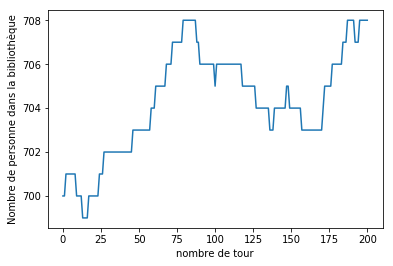

In [14]:
def plotb0(L):
    plt.figure()
    plt.plot(L)
    plt.ylabel("Nombre de personne dans la bibliothèque")
    plt.xlabel("nombre de tour")
    plt.show()
    return
plotb0(bibliothèque(700,745,.8,.9,.95,200))

Nous allons coder ci-dessous les fonctions de conversion dont nous aurons besoin.

### II. changement de format pour les jours de la semaine

"jour" -> int

In [15]:
def conversion1_jour(jour):
    ''' str * dict -> int
        Conversion : str -> int pour les jours de la semaine '''
    Jour1 = {'lundi':0,'mardi':1,'mercredi':2,'jeudi':3,'vendredi':4,'samedi':5,'dimanche':6}
    return (Jour1[jour])

In [16]:
conversion1_jour("mardi")

1

int -> "jour"

In [17]:
def conversion2_jour(jour):
    ''' int -> str
        Conversion : int -> str pour les jours de la semaine '''
    Jour2 = {0:'lundi' ,1:'mardi',2:'mercredi',3:'jeudi',4:'vendredi',5:'samedi',6:'dimanche'}
    return (Jour2[jour])

In [18]:
conversion2_jour(0)

'lundi'

** changement de format pour l'heure **

"heure minute seconde"  -> float(4 décimales)

In [19]:
def conversion1_heure(heure_format):
    ''' str -> float
        Conversion : heure/minute/seconde -> float'''
    Hentree = list(map(int,heure_format.split()))
    seconde = 0
    p= 2
    for i in Hentree:
        seconde += i * pow(60,p)
        p-=1
    return ( round(seconde/3600,4) )

In [20]:
# 12 h 42 et 5 secondes
conversion1_heure("12 42 5")

12.7014

float(4 décimales) -> "heure minute seconde"

In [21]:
def conversion2_heure(heure_format):
    '''float -> str
       Conversion : float -> heure/minute/seconde'''
    H = ''
    heure = int(heure_format)
    seconde = round( (heure_format - heure) * 3600 )
    H += str(heure) + ' ' + str(seconde//60) + ' ' + str(seconde%60)
    return H

In [22]:
conversion2_heure(1.5)

'1 30 0'

### III. Ici nous etudions l'evolution du remplissage de la bibliothèque en fonction du temps  

In [23]:
# Exemple : horaire pour la BDL
horaire = [(9,22) , (9,22) , (9,22) , (9,22) , (9,22) , (10,20),(0,0)]

def est_ouvert(heure,jour,horaire):
    '''float * str * dict[tuple] -> bool
    indique si la bibliotheque est ouverte ou fermée en fonction de l'heure actuelle 'heure', 
    du jour de la semaine 'jour' et des horaires d'ouverture 'horaire'  '''
    j = conversion1_jour(jour)
    date = horaire[j]
    if date!= (0,0):
        ouverture = date[0]
        fermeture = date[1]
        return ouverture <= heure < fermeture
    return False

In [24]:
# Exemple : On teste si la bibliothèque est ouverte le lundi à 11h.
print( est_ouvert(22,'lundi',horaire) )

False


Nouvelle modélisation en tenant compte du paramètre horaire.
De plus, nous introduirons trois nouvelles fonctions : nb_entre, nb_sortie et aff_actu.


***Nous avons collecté les affluences de la bibliothèque des licences pour une semaine.
Avec notre modèle, nous allons essayer de retrouver ces données.***

In [25]:
#affluence selon l'heure et le jour. Toutes les listes ont le même nombre d'éléments.
#On comble les trous s'il y en a.(samedi)

semaine = {'lundi' : [0.17, 0.33, 0.42, 0.5, 0.58, 0.58, 0.67, 0.75, 0.83, 0.92, 0.75, 0.5, 0.25] , 
 'mardi' : [0.08, 0.17, 0.25, 0.33, 0.42, 0.42, 0.42, 0.5, 0.58, 0.58, 0.5, 0.33, 0.17] , 
 'mercredi' : [0.17, 0.33, 0.42, 0.5, 0.5, 0.5, 0.58, 0.58, 0.58, 0.5, 0.33, 0.25, 0.08] ,
 'jeudi' : [0.08, 0.17, 0.25, 0.33, 0.5, 0.58, 0.5, 0.5, 0.67, 0.75, 0.67, 0.42, 0.17] , 
 'vendredi' : [0.08, 0.25, 0.5, 0.58, 0.67, 0.83, 0.83, 0.67, 0.67, 0.67, 0.67, 0.42, 0.17] , 
 'samedi' : [0,0.25, 0.75, 0.58, 0.75, 0.92, 0.83, 0.83, 1.0, 0.75, 0.25,0,0] }

In [26]:
def aff_actu(heure,jour):
    ''' float * str -> float
        retourne l'affluence actuelle à une heure donnée dans une bibliothèque
        Si la bibliothèque est fermée retourne 0'''
    if est_ouvert(heure,jour,horaire):
        x=semaine[jour][int(heure-9)]
        return x
    return 0
aff_actu(10,"samedi")

0.25

In [27]:
#tirage aléatoire du nombre d'entrée

# aff : le taux d'affluence actuelle
# afflim : le taux d'affluence à partir duquel la personne hésite
# p1 : la probabilité que la personne ne rentre pas dans la bibliothèque
#emax : nombre de place restant
#t: heure actuelle
#nb: nombre de tirage
# s: nombre de personnes qui entrent
# phase : découpage de la journée en plusieurs phases

def nb_entre(aff,afflim,p1,emax):
    s=0
    nb= 150
    nb=np.random.randint(0,nb)
    if nb>emax:
        nb = emax
    for i in range(nb):
        s += alea_entree(aff,afflim,p1)
    return s


In [28]:
#idem que pour nb_entre

def nb_sortie(aff,afflim,p2,bt):
    s=0
    nb= 1500
    nb=np.random.randint(0,nb)
    if nb>bt:
        nb = bt 
        
    for i in range(nb):
        s += alea_sortie(aff,afflim,p2)
    return s


In [29]:
# Bibliothèquetemp permet  en fonction des horaires d'ouverture de la bibliothèque
# et de l'heure de la journée de faire des entrée/sortie multiple.

#bt0: nombre initial de personne dans la bibliothèque. 
# bt : nombre de personne dans la bibliothèque à l'instant t
#btmax: nombre de places de la bibliothèque.
# aff : le taux d'affluence actuelle
# afflim : le taux d'affluence à partir duquel la personne hésite
# p1 : la probabilité que la personne ne rentre pas dans la bibliothèque
# p2 : la probabilité que la personne ne sort pas de la bibliothèque
# On fera un cycle de 24h

# Exemple : horaire pour la BDL
horaire = [(9,22) , (9,22) , (9,22) , (9,22) , (9,22) , (10,20),(0,0)]

def bibliothèquetemp(bt0,btmax,afflim,p1,p2,jour):
                    #(int,int,float,float,float,int)
    ''' hyp : bt0 <= bt'''
    bt=bt0
    aff=bt/btmax
    L=[bt0]
    for t in range(24):
        if est_ouvert(t,jour,horaire):
            emax = btmax-bt
            a = nb_entre(aff,afflim,p1,emax)
            b = nb_sortie(aff,afflim,p2,bt)
            if bt < btmax:
                bt += a
            if bt>0:
                bt-=b
        else:
            bt=0
        L.append(bt)
        aff=bt/btmax
    return L
        
    


affichons la courbe

#t0,btmax,afflim,p1,p2,n

nous voyons que plus la probabilité p1 de ne pas entrer est plus grande


### IV. sortie et entrée aléatoire multiple:

Nous allons améliorer notre modèle en découpant une journée en plusieurs phases  : 

'bigenter' : période d'importante entrée 

'bigexit' : période d'importante sortie 

'bigstay' : période avec flux (entrée et/ou sortie) très faible 

'unknown' : période de flux inconnu (ce sont les heures qui restent)

NB : Les phases peuvent être cumulées (attention aux incompatibilités!)


In [31]:
# On suppose que phase est valide
# L'union de tous les intervalles doit correspondre aux ouvertures de la bibliothèque
# Les intervalles sont disjoints, de la forme ']debut,fin]'

phase = {'bigenter': [(10,11) , (17,19)] ,  # (arrivée) , (fin des cours)
         'bigexit' : [(12,13) , (21,22)]  , # (déjeuner), (retour chez soi)
         'bigstay':  [(9,10) , (11,12) , (14,17)] , # (arrivée) , (cours) , (cours)
         'unknown':  [(13,14) , (19,21)]  } 

In [32]:
def decoupage(phase,heure):
    ''' dict * float -> str
        retourne la phase correspondante à l'heure
        hyp : est_ouvert(heure...) == True '''
    for cle in phase:
        for couple in phase[cle]:
            debut=couple[0] 
            fin=couple[1]
            if debut <= heure < fin:
                return cle
    return 'error'

In [33]:
#Voici un test pour vérifier la fonction découpage, elle ne doit pas retourner 'error' aux horaires d'ouverture
for i in range(24):
        print( decoupage(phase,i) ,i )
#On retourne 'error' aux horaires de fermeture

error 0
error 1
error 2
error 3
error 4
error 5
error 6
error 7
error 8
bigstay 9
bigenter 10
bigstay 11
bigexit 12
unknown 13
bigstay 14
bigstay 15
bigstay 16
bigenter 17
bigenter 18
unknown 19
unknown 20
bigexit 21
error 22
error 23


In [34]:
#emax : nombre de place restant
# bt : nombre de personne dans la bibliothèque à l'instant t
#nb: nombre d'entree/sortie
def correction(nb,bt,emax):
    '''retourne le nombre d'entrée réalisable.'''
    if nb >= 0:
        if nb > emax:
            nb = emax
    else:
        if -nb > bt: #le signe '-' correspond à la valeur absolue
            nb = -bt    
    return nb

In [35]:
#Nous allons tester correction(nb,bt,emax)

print(correction(500,500,10))
# Nous avons 500 personnes dans la bibliothèque et il reste 10 places libres.
# Nous essayons de faire entrer 500 personnes, mais ce n'est pas possible

print(correction(-551,400,10))
#Nous pouvons faire sortir au maximumle nombre de personne qu'il y a dans la bibliothèque

10
-400


*** Si nb_flux est positif, il est compté en entrée, sinon en sortie ***

***exemple:***

'bigenter' : nbtir 100

'bigexit' : -100

'bigstay' : -10 à 10

'unknown' : -100 à 100


In [36]:
def signe(nombre):
    ''' Nombre -> Nombre
        retourne 1 si Nombre est positif, sinon -1'''
    if nombre < 0:
        return -1
    return 1

In [37]:
print( signe(5) )
print( signe(-5) )
print( signe(0) )

1
-1
1


In [38]:
def alea_signe():
    ''' None -> int
        retourne aléatoirement 0 ou 1'''
    u = np.random.random() # u est un nombre aléatoire entre 0 et 1
    if u < 0.5: 
        return -1
    return 1

In [39]:
c1,c2 = 0,0
for loop in range(1000):
    a=alea_signe()
    if a==1:
        c1+=1
    else:
        c2+=1
print(c1/1000)
print(c2/1000)

0.5
0.5


In [40]:
def alea_flux(aff):
    '''
    float->int
    en fonction du taux d'affluence et d'une probabilité ,retourne 1 si l'élève rentre, sinon 0.
    '''
    u = np.random.random() # u est un nombre aléatoire entre 0 et 1
    if u < 0.5: 
        return 0
    return 1

In [41]:
#Ce programme est identique à alea_signe()

In [42]:
# s: nombre de personnes qui entrent ou qui sortent de al bibliothèque
def nb_flux(aff,Nom_phase,btmax):
    '''float * int * str * int -> int
       retourne le nombre de flux'''  
    
    # Attention ! : 'bigstay' et 'unknown' sont en valeurs absolues
    #Flux est un dictionnaire de proportion en fonction des phases
    Flux = {"bigenter": 1/2,'bigexit' : -1/6, 'bigstay' : 1/70, 'unknown' : 1/4}
    
    nbtir=round(Flux[Nom_phase]*btmax)
    s=0
    for i in range(abs(nbtir)):
        s += alea_flux(aff)
    s*= signe(nbtir)
    
    if Nom_phase == 'bigstay' or Nom_phase == 'unknown':
        s*=alea_signe()
    return s

In [43]:
# Voici un test de la fonction nb_flux(...) :
nb_flux(0.5,"unknown",1000)

115

Dans bibliothèquetemp2, nous supprimerons les paramètres afflim, p1, p2 pour simplifier nos fonctions. 
En d'autres termes, nous ne tiendrons plus compte de l'hésitation des étudiants.

In [44]:
# Bibliothèquetemp2 permet  en fonction des horaires d'ouverture de la bibliothèque
# et de l'heure de la journée de faire des entrée/sortie multiple.

#bt0: nombre initial de personne dans la bibliothèque. 
# bt : nombre de personne dans la bibliothèque à l'instant t
#btmax: nombre de places de la bibliothèque.
# aff : le taux d'affluence actuelle
# afflim : le taux d'affluence à partir duquel la personne hésite
# emax : nombre place restant
# nb : nombre d'entree/sortie
# On fera un cycle de 24h

# Exemple : horaire pour la BDL
horaire = [(9,22) , (9,22) , (9,22) , (9,22) , (9,22) , (10,20),(0,0)]

# On suppose que phase est valide.

#découpage de la journée en plusieurs phases

phase = {'bigenter': [(10,11) , (17,19)] ,  # (arrivée) , (fin des cours)
         'bigexit' : [(12,13) , (21,22)]  , # (déjeuner), (retour chez soi)
         'bigstay':  [(9,10) , (11,12) , (14,17)] , # (arrivée) , (cours) , (cours)
         'unknown':  [(13,14) , (19,21)]  } 

def bibliothèquetemp2(bt0,btmax,jour):
                    #(int,int,str)
    ''' hyp : 0 <= bt <= btmax
        retourne la liste des affluences pour toutes les heures de la journée'''
    bt=bt0
    aff=bt/btmax
    L=[bt0]
    for t in range(24):
        if est_ouvert(t,jour,horaire):
            Nom_phase = decoupage(phase,t)
            emax = btmax-bt
            nb=nb_flux(aff,Nom_phase,btmax)
            nb=correction(nb,bt,emax)
            bt+=nb
        else:
            bt=0
            
        L.append(bt)
        aff=bt/btmax
    return L

In [45]:
bibliothèquetemp2(0,745,"lundi")

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 187,
 181,
 121,
 37,
 33,
 27,
 33,
 222,
 414,
 523,
 608,
 540,
 0,
 0]

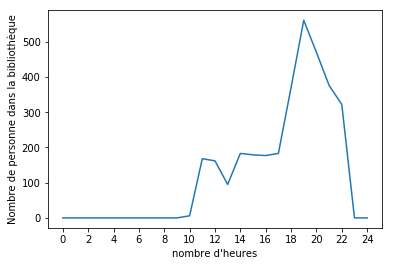

In [46]:
def plotb2(L):
    plt.figure()
    plt.plot(L)
    plt.ylabel("Nombre de personne dans la bibliothèque")
    plt.xlabel("nombre d'heures")
    plt.xticks([i for i in range(0,25,1)])
    plt.show()
    return 
plotb1(bibliothèquetemp2(0,745,"lundi"))

## Partie 2 : Remplissage avec une géographie de la bibliothèque et un fichier de l'étudiant

###  I. Fonction génératrice de fichier Personne 

Dans notre fichier **Personne**, nous avons les données suivantes : 

    _âge 
    _etat social 
    _étude
    _emploi du temps

**age** : L'age sera compris entre 18 et 29 ans.

**etat social** : L'état social est le nombre d' "accompagnateurs" d'une personne, compris entre 0 et 10

**étude** : Nous tiendrons compte des études que l'on peut faire à Jussieu, c'est à dire :

            _ le niveau d'étude : licence, master, doctorat ou autre.
            _ le nom du diplôme préparé : mathématiques, physiques... (Nous serons plus précis sur ce point-là)
            _ l'année en cours dans le diplôme : de 1 à 5
            _ Voici un lien : http://sciences.sorbonne-universite.fr/fr/formations/diplomes.html

**emploi du temps** : Il permet de définir les plages horaires quand l'étudiant sera susceptible d'aller à la bibliothèque. C'est plages excluent : heure de déjeûner, heure de cours, heure de loisirs...

a) **Catégorie d'âge dans l'ensemble des étudiants**

Nous définissons trois catégories d'âge : avec p, une proportion.

    _18 à 21 ans : p1 = ...
    _21 à 25 ans : p2 = ...
    _26 à 29 ans : p3 = ...
  

b) **Catégorie pour les etats sociaux**

Nous déterminons les proportions en fonction d'intervalles : 

Les valeurs sont le nombre de personne accompagnatrices.

    _0 : p1 = ...
    _1 : p2 = ...
    _2 à 5 : p3 = ...
    _6 à 8 : p4 = ...
    _9 à 10 : p5= ...

c) **Différentes études**
    
    Le niveau d'étude et l'année en cours du diplôme ont été déterminés précédemment
    
    c.1) nom du diplôme préparé : 
    
                ** licence ** : cycle d'intégration, chimie, électronique, informatique, mathématiques, mécanique,    physique, technologie, terre_vie.
        ** master** : bio, chimie, informatique, mathématiques, physique, ingénieur, enseignement, terre_vie.
        ** doctorat** : modélisation et ingénierie, énergie_matiere_univers, terre_vivante_environnement, vie_sante
   

d) **Emploi du temps**

    Cette partie nécessite la création de fonctions génératrices "d'emploi du temps" avec une période de loisirs et une période     "bibliothèque".
    
    d.1) Loisirs : 
    
        Remarque : Les loisirs sont les périodes durant lesquelles, l'étudiant ne peut pas aller à la bibliothèque.
        pause_déjêuner, DVE, DAPS, sur_campus, extra_scolaires, salle_info...
    

Maintenant nous allons construire tout les éléments dont nous avons besoin pour cette partie.

In [103]:
%matplotlib inline     
# ^Sans animations
# %matplotlib notebook 
# ^Avec animations
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from pylab import*
from random import randint

**Nous crééons une fonction génératrice d'âges, en tenant compte de probabilité**

In [104]:
#Voici notre dictionnaire de probabilité p_age

# valeur = probabilité et clé = age compris entre deux bornes ([debut,fin])
p_age = {(18,21) : 0.5 , (22,25) : 0.3 , (26,29) : 0.2}

# On teste si la somme des probabilités vaut 1

def verif_dic(dictionnaire):
    s=0.0
    for valeur in dictionnaire.values():
        s+=valeur
    print("p : ",s)
    print("Le dictionnaire est",s==1)

verif_dic(p_age)

p :  1.0
Le dictionnaire est True


In [105]:
def Age():
    ''' retourne un entier compris entre 18 et 29 ans en tenant compte de probabilité'''
            
    u = np.random.random()
    s = 0
    for k in p_age.keys():
        s += p_age[k]
        if u < s:
            debut = k[0]
            fin = k[1]
            return randint(debut,fin)
Age()

23

Nous vérifions que la fonction age() retourne bien aléatoirement des âges du dictionnaire p_age en tenant compte de probabilités.

In [106]:
def verif_age1():
    stat_age = { (18,21) :0 , (22,25):0 , (26,29): 0}
    age = 0
    for loop in range(10000):
        age = Age()
        for cle in stat_age:
            debut = cle[0]
            fin = cle[1]
            if debut <=age <= fin:
                stat_age[cle] += 1
    return stat_age
verif_age1()
# Les valeurs du dictionnaire retourné correspondes aux probabilités associées aux intervalles

{(18, 21): 5043, (22, 25): 2910, (26, 29): 2047}

In [107]:
def verif_age2():
    stat_age =  { (18,21) :0 , (22,25):0 , (26,29): 0}
    # on créer une liste pour stocker le nombre doccurences de chaque âge
    L =[0]*12
    age = 0
    for loop in range(10000):
        age = Age()
        L[age-18] += 1
    return[ 0]*18 + L
verif_age2() 
# On remarque que la probabilité d'avoir un âge donné est égale à la probabilité de la tranche d'âge, divisée par 4.

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1296,
 1221,
 1315,
 1241,
 764,
 751,
 703,
 713,
 534,
 505,
 480,
 477]

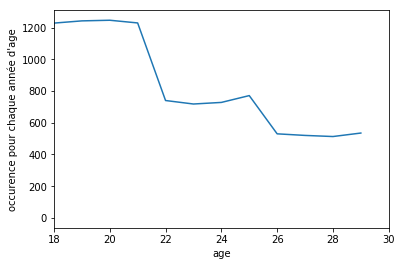

In [108]:
def plot_age(L):
    plt.figure()
    plt.gca().set_xlim(18, 30)
    plt.ylabel("occurence pour chaque année d'age")
    plt.xlabel("age")
    plt.plot(L)
    plt.show()
    return
plot_age(verif_age2())

** Nous allons créer pas à pas une fonction génératrice d'emploi du temps, dont le résultat dépend des études des personnes et qui retourne un booléen**

Nous utiliserons les probabilités conditionnelles, d'où la formule :

p
B
(
A
) =
p
(
A
∩
B
)
/
p
(
B
)
.

Soit :

_A : préparer ou  avoir un diplôme donné

In [91]:
dic_diplome = {'licence' :0.17,'master': 0.27, 'doctorat' : 0.56}
verif_dic(dic_diplome)
def diplome():
    '''int -> str
    retourne un  nom de diplôme en tenant compte du dictionnaire dic_diplôme'''
    u = np.random.random()
    s = 0
    for k in dic_diplome.keys():
        s += dic_diplome[k]
        if u < s:
            return k
diplome()

p :  1.0
Le dictionnaire est True


'doctorat'

c.1) nom du diplôme préparé : 
    
         ** licence ** : cycle d'intégration, chimie, électronique, informatique, mathématiques, mécanique,    physique, technologie, terre_vie.
        ** master** : bio, chimie, informatique, mathématiques, physique, ingénieur, enseignement, terre_vie.
        ** doctorat** : modélisation et ingénierie, énergie_matiere_univers, terre_vivante_environnement, vie_sante
   

In [ ]:
#Crééons trois listes contenant les différentes matières enseignées selon le diplôme préparé.

licence = ['integration', 'chimie' , 'electronique' , 'informatique', 'mathematiques', 'mecanique', 'physique', 
           'technologie', 'terre']
master = ['bio', 'chimie' , 'informatique','mathematiques', 'physique','ingenieur','enseignement', 'terre']
doctorat = ['modelisation', 'energie','terre','sante']

Notre nouvelle fonction retournera les intervalles de temps durant lequel l'étudiant est susceptible de venir
à la bibliothèque.

 Voici les différents 'loisirs' :   
 pause_déjêuner, DVE, DAPS, sur_campus, extra_scolaires, salle_info...

In [95]:
# Nous crééons un dictionnaire qui associera à chaque loisir, une proportion des étudiants qui pratiquent 
# régulièrement ce loisir et un intervalle de temps où le loisir sera réalisé.

loisir = { 'dejeuner':(0.99,(11,14)), 'VE' :(0.2,()), 
          'DAPS': (0.1,()) ,'campus' : (,()) , 'extra': (p,()) , 'salle':(p,()) }

NameError: name 'p' is not defined

**Nous définissons la classe "Personne" avec les attributs qui la caractérisent**

In [64]:
class Personne:

    """Classe définissant une personne caractérisée par :

    - âge

    - etat social

    - étude

    - emploi du temps  """
    
    def __init__(self, age, etat_social, etude, emploi_temps):

        """Constructeur de notre classe"""

        self.age = age

        self.etat_social = etat_social

        self.etude = etude

        self.emploi_temps = emploi_temps


Nous définissons une classe **compteur_Personne** qui nous permettra de compter le nombre d'objets de classe Personne

In [59]:
class Compteur_Personne:

    """Cette classe possède un attribut de classe qui s'incrémente à chaque

    fois que l'on crée un objet de ce type"""


    objets_crees = 0 # Le compteur vaut 0 au départ

    def __init__(self):

        """À chaque fois qu'on crée un objet, on incrémente le compteur"""

        Compteur_Personne.objets_crees += 1

## II.Modélisation géographique

La bibliothèque se compose de salles de travail et de place commune, nous allons nous interesser aux place commune car les salles de travail fonctionnent par reservation, Nous avons donc  : btmax= 400 places.

***Remplissage d'une matrice de nombre en fonction de l'etude et l'etat_social.***

Les nombres  utilisées sont : 1 0 -1

"1": place occupée

"0": place libre

"-1": espace non utilisable (murs,allées...)

    M =np.zeros((nblignes,nbcolonnes),dtype = ...)

    len(M[:,0]))  : # nombre de lignes.
    len(M[0,:])) : # nombre de colonnes.
    
    M[:,y] accès pour la y+1 ème colonne.
    M[x,:] accès pour la x+1 ème ligne.

### A.Nous crééons le côté math de la BDL.

In [52]:
%matplotlib inline     
# ^Sans animations
# %matplotlib notebook 
# ^Avec animations
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from pylab import*
from random import randint

Nous allons créer une fonction Affiche_rectangle qui permettra de dessiner les tables de travail sur les 

matrices.

Nous crééons la fonction c_liste(debut, nbtables, largeur) qui génère la liste des couples d'entiers,

représentant le coin gauche des tables de travail.

In [53]:
# debut : coordonnées sous la forme d'un tuple du coin gauche de la table.
# nbtables : nombre de tables de même largeur sur une colonne.
# largeur : nombre de lignes occupées par la table de travail.

def c_liste(debut,nbtables,largeur):
    ''' tuple * int * int -> LISTE[TUPLE]'''
    x = debut[0]
    y = debut[1]
    L=[]
    L =  [(i,y,largeur) for i in range(x,x+ nbtables*(largeur+1) ,largeur+1)]
    return L

In [54]:
# Test de la fonction c_liste()

print(   c_liste( (1,1),2,2 )  )
print(   c_liste( (10,1) , 9,2) )
print(   c_liste( (14,19),6,2 )      )

[(1, 1, 2), (4, 1, 2)]
[(10, 1, 2), (13, 1, 2), (16, 1, 2), (19, 1, 2), (22, 1, 2), (25, 1, 2), (28, 1, 2), (31, 1, 2), (34, 1, 2)]
[(14, 19, 2), (17, 19, 2), (20, 19, 2), (23, 19, 2), (26, 19, 2), (29, 19, 2)]


In [55]:
# 'ranger()'' prend en paramètre une liste constitué de l'entier 'nbtables', suivi d'un nombre quelconque de 
# 3_uplet (debut,nbtables,largeur).

def ranger(LISTE):
    '''LISTE[int * TUPLE] -> DIC[ int:  LISTE[TUPLE]  ]
        Retourne le dictionnaire qui associe 'nbtables' à liste composée de tous les couples 'debut', 
        générées à partir de 3_uplets'''
    D = {}
    for valeur in LISTE:
        if type(valeur)== int: 
            L= []
            cle = valeur
            D[cle] = L
        else:
            L+= c_liste(valeur[0],valeur[1], valeur[2])
    return D

In [56]:
# test de la fonction ranger()
ranger([ 10, [(1,1),2,2] , [(10,1),9,2] , [(14,19),6,2],6, [(12,12),1,2], [(20,12),1,2] , [(1,12),1,2] ])
# Cela représente tous les 'debut', des tables entrées en paramètres

{6: [(12, 12, 2), (20, 12, 2), (1, 12, 2)],
 10: [(1, 1, 2),
  (4, 1, 2),
  (10, 1, 2),
  (13, 1, 2),
  (16, 1, 2),
  (19, 1, 2),
  (22, 1, 2),
  (25, 1, 2),
  (28, 1, 2),
  (31, 1, 2),
  (34, 1, 2),
  (14, 19, 2),
  (17, 19, 2),
  (20, 19, 2),
  (23, 19, 2),
  (26, 19, 2),
  (29, 19, 2)]}

In [57]:
# M[:,y] accès pour la y+1 ème colonne.
# M[x,:] accès pour la x+1 ème ligne.
# c3 : signifie place libre

# initialisation d'une liste qu'avec des -1
L = [ [  -1 for _ in range(21) ] ] * 36
# conversion vers le type array
M = np.asarray(L)

In [58]:

def Affiche_rectangle(X,c,n,M):
    ''' (int*int) * str * int -> None
    X : coin gauche de la table de coordonnées (x,y)
    c : caractère à afficher dans le rectangle
    n : le nombre de caractères du rectangle (pair)
    l : largeur de la table
    L : longueur de la table
    '''
    
    L = int(n/2)
    
    x = X[0]
    y = X[1]
    l = X[2]
    
    M[x:x+l , y:y+L] = c
    return M

In [59]:
# Voici un premier test, où on vient de dessiner une table de coordonnées (0,1), de largeur 2 et de 10 places avec '0'
# comme caractère de remplissage.
print ( Affiche_rectangle((0,1,2),0,10,M) )

[[-1  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1

In [60]:
# Nous crééons le dictionnaire D_table qui nous donnera toutes les informations nécessaires pour dessiner la
# géographie de la bibliothèque sous la forme d'une matrice.
# les sous_listes sont de la forme : [X,nbTables,largeur]

L_table = [ 10, [(1,1),3,2] , [(13,1) , 9 ,2] , [(14,11),1,2] , [(18,11),1,2] , [(22,11),1,2] , [(26,11),1,2] ,
           [(30,11),1,2] , [(35,11),1,2] , 
           
           6, [(1,7),1,2] , [(10,1),1,2] ,  [(18,7),1,2] , [(22,7),1,2] , [(-5,7),1,2] ]

D_table = ranger(L_table)
print(D_table)

{10: [(1, 1, 2), (4, 1, 2), (7, 1, 2), (13, 1, 2), (16, 1, 2), (19, 1, 2), (22, 1, 2), (25, 1, 2), (28, 1, 2), (31, 1, 2), (34, 1, 2), (37, 1, 2), (14, 11, 2), (18, 11, 2), (22, 11, 2), (26, 11, 2), (30, 11, 2), (35, 11, 2)], 6: [(1, 7, 2), (10, 1, 2), (18, 7, 2), (22, 7, 2), (-5, 7, 2)]}


In [61]:
def initM(nbcol,nblig,D_table):
    #choix des caractères
    c1 = 7
    c2 = 1
    c3 = 0
    # initialisation d'une liste qu'avec des 'c1'
    L = [ [  c1 for _ in range(nbcol) ] ] * nblig
    # conversion vers le type array
    M = np.asarray(L)
    
    ''' int * int -> matrix
    retourne la matrice représentant la géographie de la bibliothèque'''
    
    for key in D_table:
        for X in D_table[key]:
            M = Affiche_rectangle(X,c3,key,M)
            
    return M

In [62]:
print(initM(21,40,D_table) )



[[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 0 0 0 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 0 0 0 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 0 0 0 0 0 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 0 0 0 0 0 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 0 0 0 7 0 0 0 0 0 7 7 7 7 7]
 [7 0 0 0 0 0 7 0 0 0 7 0 0 0 0 0 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 

In [63]:
# table est représentée par des coordonnées (x,y) de la forme (posLigne, posColonne)
# deplacement : est représenté par (a,b), respectivement , déplacement vertical et horizontal
# Longueur et Largeur : les dimensions de la matrice

D_table = {10: [(1, 1, 2), (4, 1, 2), (7, 1, 2), (13, 1, 2), (16, 1, 2), (19, 1, 2), (22, 1, 2), (25, 1, 2),
                (28, 1, 2), (31, 1, 2), (34, 1, 2), (37, 1, 2), (14, 11, 2), (18, 11, 2), (22, 11, 2), (26, 11, 2),
                (30, 11, 2), (35, 11, 2)], 
           6: [(1, 7, 2), (10, 1, 2), (18, 7, 2), (22, 7, 2), (-5, 7, 2)]}

nbColonnes = 24
nbLignes  = 40

def deplace_table(table,D_table,deplacement,largeur):
    '''LISTE * DICT * COUPLE -> DICT
    retourne le dictionnaire modifié en ayant deplacé la 'table' en fonction du 'deplacement'.'''
    
    x = table[0]
    y = table[1]
    
    Dx = deplacement[0]
    Dy = deplacement[1]
    
    for liste in D_table.values():
        for  icouple in range(len(liste)):
            up = liste[icouple]
            if up == (x,y,largeur):
                 liste[icouple] = (  (up[0] + Dx) % nbLignes,  (up[1] + Dy) % nbColonnes ,largeur )
    return D_table

In [64]:
deplace_table(  (1 , 1) , D_table , ( 1, 0) , 2 )
# On affiche notre nouvelle bibliothèque après modification (la table en haut à gauche a été descendue d'un rang)
print(initM(21,40,D_table))

[[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 0 0 0 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 0 0 0 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 0 0 0 0 0 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 0 0 0 0 0 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 0 0 0 7 0 0 0 0 0 7 7 7 7 7]
 [7 0 0 0 0 0 7 0 0 0 7 0 0 0 0 0 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 

In [65]:
D_table = {10: [(1, 1, 2), (4, 1, 2), (7, 1, 2), (13, 1, 2), (16, 1, 2), (19, 1, 2), (22, 1, 2), (25, 1, 2),
                (28, 1, 2), (31, 1, 2), (34, 1, 2), (37, 1, 2), (14, 11, 2), (18, 11, 2), (22, 11, 2), (26, 11, 2),
                (30, 11, 2), (35, 11, 2)], 
           6: [(1, 7, 2), (10, 1, 2), (18, 7, 2), (22, 7, 2), (-5, 7, 2)]}

nbColonnes = 21
nbLignes  = 40

# La rangee est représentée par le coordonné PosColonne.
# deplacement : est représenté par (a,b), respectivement , déplacement vertical et horizontal

def deplace_range(Icolonne,deplacement,D_table):
    '''int * COUPLE[int] * DICT ->  DICT
    retourne le dictionnaire modifié en ayant déplacer la rangée 'Icolonne' de 'deplacement' '''
    
    Dx = deplacement[0]
    Dy = deplacement[1]
    
    for liste in D_table.values():
        for  icouple in range(len(liste)):
            up = liste[icouple]
            if up[1] == Icolonne:
                 liste[icouple] = (  (up[0] + Dx) % nbLignes,  (up[1] + Dy) % nbColonnes ,up[2])

In [66]:
# On déplace de trois rangs vers la droite la troisième rangée.
# On déplace de deux rangs vers la droite la deuxième rangée.
deplace_range(11,(0,4),D_table)
deplace_range(7,(0,2),D_table)
print(initM(21,40,D_table) )

[[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 0 0 0 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 0 0 0 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 0 0 0 0 0 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 0 0 0 0 0 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 0 0 0 7 7 7 0 0 0 0 0 7]
 [7 0 0 0 0 0 7 7 7 0 0 0 7 7 7 0 0 0 0 0 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 

In [67]:
# On va faire une copie de D_table : Dic_plan.
# Dic_plan sera notre bibliothèque initiale.

import copy
Dic_plan = copy.deepcopy(D_table)
print(initM(21,40,Dic_plan))

[[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 0 0 0 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 0 0 0 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 0 0 0 0 0 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 0 0 0 0 0 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 0 0 0 7 7 7 0 0 0 0 0 7]
 [7 0 0 0 0 0 7 7 7 0 0 0 7 7 7 0 0 0 0 0 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 

In [68]:
# écrivons une fonction qui calcule le nombre de places d'une bibliothèque

def Nbplaces(D):
    '''DIC -> int
    retourne le nombre de places d'une bibliothèque'''
    
    NbPlaces = 0
    
    for cle in D:
        NbPlaces += len(D[cle])*cle
    return NbPlaces

In [69]:
# Dans notre bibliothèque il y a :
Nbplaces(Dic_plan)

210

In [70]:
# écrivons une fonction qui calcule les coordonnées de toutes les places de la bibliothèque.

# (i,j) : place en haut à gauche d'une table
# L : longueur de la table
# l : largeur de la table

def Pos_place(D):
    '''Dic -> LISTE
    retourne une liste de positions (x,y)'''
    liste=[]
    for cle in D:
        for up in D[cle]:
            i,j,L,l = up[0],up[1],cle//2,up[2]
            for x in range(i,i+l):
                for y in range(j,j+L):
                    liste.append((x,y))
                
            
    return liste

In [71]:
# On affiche toutes les positions(x,y) de toutes les places de la bibliothèque.
print(Pos_place(Dic_plan),"\n")
# On vériie le nombre de places : 
print(len(Pos_place(Dic_plan)),"PLACES")

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (13, 1), (13, 2), (13, 3), (13, 4), (13, 5), (14, 1), (14, 2), (14, 3), (14, 4), (14, 5), (16, 1), (16, 2), (16, 3), (16, 4), (16, 5), (17, 1), (17, 2), (17, 3), (17, 4), (17, 5), (19, 1), (19, 2), (19, 3), (19, 4), (19, 5), (20, 1), (20, 2), (20, 3), (20, 4), (20, 5), (22, 1), (22, 2), (22, 3), (22, 4), (22, 5), (23, 1), (23, 2), (23, 3), (23, 4), (23, 5), (25, 1), (25, 2), (25, 3), (25, 4), (25, 5), (26, 1), (26, 2), (26, 3), (26, 4), (26, 5), (28, 1), (28, 2), (28, 3), (28, 4), (28, 5), (29, 1), (29, 2), (29, 3), (29, 4), (29, 5), (31, 1), (31, 2), (31, 3), (31, 4), (31, 5), (32, 1), (32, 2), (32, 3), (32, 4), (32, 5), (34, 1), (34, 2), (34, 3), (34, 4), (34, 5), (35, 1), (35, 2), (35, 3), (35, 4), (35, 5), (37, 1), (37, 2), (37, 3), (37, 4), (37

In [72]:
# Nous allons générer soit '0' soit '1', cela nous sera utile pour remplir notre bibliothèque aléatoirement.

def alea_entre2():
    u = np.random.random()            # u est un nombre aléatoire entre 0 et 1
    if u < 0.5:
        return 1
    else:
        return 0
print(alea_entre2())

1


 **Rappel : Comment manipuler les matrices efficacement ? **
  
  
            len(M[:,0])  : # nombre de lignes.
            len(M[0,:]) : # nombre de colonnes.

            M[:,y] accès pour la y+1 ème colonne.
            M[x,:] accès pour la x+1 ème ligne.

In [ ]:
# Importons le module 'randint'
from random import randint

# Nous conservons notre dictionnaire initial
Dic_plan = {10: [(1, 1, 2), (4, 1, 2), (7, 1, 2), (13, 1, 2), (16, 1, 2), (19, 1, 2), (22, 1, 2), (25, 1, 2), (28, 1, 2), 
            (31, 1, 2), (34, 1, 2), (37, 1, 2), (14, 15, 2), (18, 15, 2), (22, 15, 2), (26, 15, 2), (30, 15, 2), (35, 15, 2)], 
            6: [(1, 9, 2), (10, 1, 2), (18, 9, 2), (22, 9, 2), (35, 9, 2)]}

# Nous avons une liste de position des places de la bibliothèque:
L_Pos = Pos_place(Dic_plan)

# Nous initialisons notre matrice avec Dic_plan.
M = initM(21,40,Dic_plan)

# Nous calculons le nombre de places de la bibliothèque.
nbPlaces = Nbplaces(Dic_plan)
nbPlaces = len(L_Pos)

# Les dimensions de la matrice.
nbColonnes = 21
nbLignes  = 40

def RemplissageMath(flux,M): #après mettre les 4 paramètres ( (matiere,etude) ,etat_social)
    '''int * matrix -> matrix
    retourne matrice après lui avoir appliquée le flux "nb" '''
    
    nbLig , nbCol = len(M[:,0]) , len(M[0,:])
    iLig, iCol = 0,0
    
    if(flux == 0):
        return M
    elif(flux > 0):
        for loop in range(flux):
            while( (M[iLig,iCol]) !=0  ):
                iLig = randint(0,nbLig - 1)
                iCol = randint(0,nbCol - 1)
            M[iLig,iCol] = 1
        return M
    else:
        for loop in range(abs(flux)):
            while( (M[iLig,iCol]) != 1  ):
                iLig = randint(0,nbLig - 1)
                iCol = randint(0,nbCol - 1)
            M[iLig,iCol] = 0
        return M

In [ ]:
def verif_placement(M):
    Nbpersonnes = 0
    for couple in L_Pos:
        if(M[couple[0],couple[1]]):
            Nbpersonnes+=1
    return Nbpersonnes

In [ ]:
# Nous plaçons 100 personnes aléatoirement dans la bibliothèque.
print(RemplissageMath(100,M),"\n")

# Nous vérifions que nous avons bien placé 100 personnes:
print(verif_placement(M))


# Nous vidons la bibliothèque.
M = initM(21,40,Dic_plan)

### B.remplissage avec le temps

Nous allons modéliser l'évolution du remplissage de la bibliothèque de manière géographique.

Nous appliquerons la fonction 'Modif_matrice(nb,M)' qui obéira aux règles suivantes :
    
    - Si le flux est nul, la matrice ne sera pas modifiée.
    - Si le flux est strictement négatif, les '1' rencontrés deviendront '0'.
    - Si le flux est strictement positif, les '0' rencontrés deviendront '1'.
    - Les allées et les murs de la bibliothèque, représentés par des '7' seront non-modifiables.

In [ ]:
 def RemplissageMath(flux,M): #après mettre les 4 paramètres ( (matiere,etude) ,etat_social)
    '''int * matrix -> matrix
    retourne matrice après lui avoir appliquée le flux "nb" '''
    
    nbLig , nbCol = len(M[:,0]) , len(M[0,:])
    iLig, iCol = 0,0
    
    if(flux == 0):
        return M
    elif(flux > 0):
        for loop in range(flux):
            while( (M[iLig,iCol]) !=0  ):
                iLig = randint(0,nbLig - 1)
                iCol = randint(0,nbCol - 1)
            M[iLig,iCol] = 1
        return M
    else:
        for loop in range(abs(flux)):
            while( (M[iLig,iCol]) != 1  ):
                iLig = randint(0,nbLig - 1)
                iCol = randint(0,nbCol - 1)
            M[iLig,iCol] = 0
        return M

In [149]:
# Bibliothèquetemp3 permet en fonction des horaires d'ouverture de la bibliothèque
# et de l'heure de la journée de faire des entrée/sortie multiple.

#bt0: nombre initial de personne dans la bibliothèque. 
# bt : nombre de personne dans la bibliothèque à l'instant t
#btmax: nombre de places de la bibliothèque.
# aff : le taux d'affluence actuelle
# emax : nombre place restant
# nb : nombre d'entree/sortie
# On fera un cycle de 24h

# Exemple : horaire pour la BDL
horaire = [(9,22) , (9,22) , (9,22) , (9,22) , (9,22) , (10,20),(0,0)]

# On suppose que phase est valide.

#découpage de la journée en plusieurs phases

phase = {'bigenter': [(10,11) , (17,19)] ,  # (arrivée) , (fin des cours)
         'bigexit' : [(12,13) , (21,22)]  , # (déjeuner), (retour chez soi)
         'bigstay':  [(9,10) , (11,12) , (14,17)] , # (arrivée) , (cours) , (cours)
         'unknown':  [(13,14) , (19,21)]  } 

#Notre nouvelle fonction bibliothèquetemp3 utilisera les matrices.

def bibliothèquetemp3(bt0,btmax,jour,heure):
                    #(int, int,str ,int)
    ''' hyp : 0 <= bt <= btmax'
        Retourne l'état de la matrice à l'heure voulue.'''
    
    # Nous initialisons notre matrice avec Dic_plan.
    M = initM(21,40,Dic_plan)
    
    bt=bt0
    aff=bt/btmax
    
    for t in range(heure+1):
        if est_ouvert(t,jour,horaire):
            Nom_phase = decoupage(phase,t)
            emax = btmax-bt
            nb=nb_flux(aff,Nom_phase,btmax)
            nb=correction(nb,bt,emax)
            bt+=nb
            M=RemplissageMath(nb,M)
        else:
            bt=0
            M = initM(21,40,Dic_plan)
            
        aff=bt/btmax
    
    print(verif_placement(M),"personnes dans la bibliothèque","\n")
    return M


#annimation M en fonction du temps

44 personnes dans la bibliothèque 



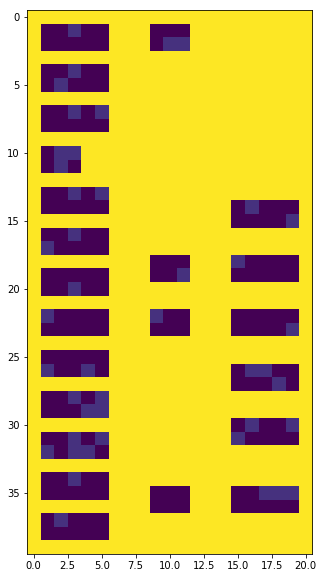

In [181]:
# On calcule le nombre de personnes le lundi à 10h
M = bibliothèquetemp3(0,210,'lundi',10)
fig = plt.figure(figsize=(10,10))
plt.imshow(M,figure=fig)

0 personnes dans la bibliothèque 

49 personnes dans la bibliothèque 

49 personnes dans la bibliothèque 

41 personnes dans la bibliothèque 

12 personnes dans la bibliothèque 

62 personnes dans la bibliothèque 

63 personnes dans la bibliothèque 

52 personnes dans la bibliothèque 

111 personnes dans la bibliothèque 

160 personnes dans la bibliothèque 

72 personnes dans la bibliothèque 

165 personnes dans la bibliothèque 

193 personnes dans la bibliothèque 

0 personnes dans la bibliothèque 

2 personnes dans la bibliothèque 

49 personnes dans la bibliothèque 

64 personnes dans la bibliothèque 

34 personnes dans la bibliothèque 

0 personnes dans la bibliothèque 

61 personnes dans la bibliothèque 

52 personnes dans la bibliothèque 

18 personnes dans la bibliothèque 

64 personnes dans la bibliothèque 

155 personnes dans la bibliothèque 

161 personnes dans la bibliothèque 

129 personnes dans la bibliothèque 

71 personnes dans la bibliothèque 

0 personnes dans la bibli

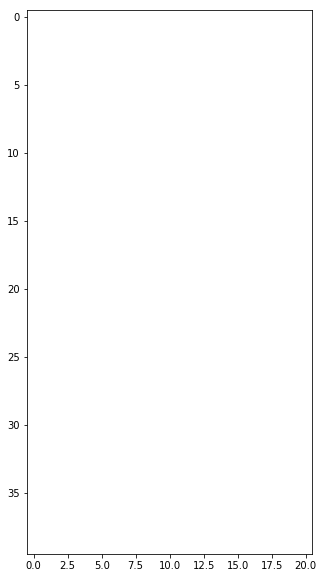

In [186]:
semaine = ['lundi' ,'mardi','mercredi','jeudi','vendredi','samedi','dimanche']
fig = plt.figure(figsize=(10,10))
im_list = []
for jours in semaine:
    for heure in range(9,23):
        M = bibliothèquetemp3(0,210,jours,heure)
        im = plt.imshow(M,figure=fig,animated = True)
        im_list.append([im])
ani = animation.ArtistAnimation(fig, im_list, interval=50, blit=True,
                                repeat_delay=1000)
ani

<IPython.core.display.Javascript object>


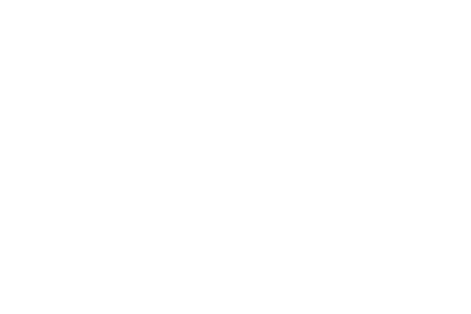

<IPython.core.display.Javascript object>


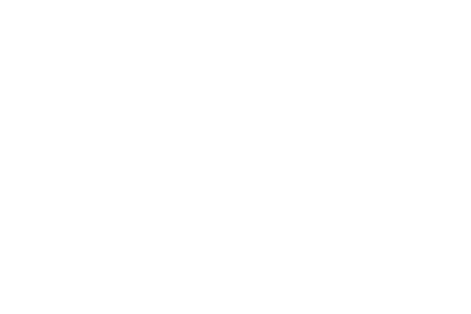

In [191]:

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# ani.save('dynamic_images.mp4')

plt.show()